# Problem 1
## (a)

\begin{align}
    M_y(t) & = e^{ta}\sum_i \sum_j P(U_i) P(X_j) e^{tU_iX_j} \\
    & = e^{ta} \sum_i \sum_j \frac{1}{2} \Big( e^{btX_i} + e^{-btX_i} \Big) P(X_i) \\
    & = e^{ta} \frac{1}{2} \Big( \frac{1}{1-bt} + \frac{1}{1+bt} \Big)\\
    & = e^{ta} \frac{1}{2} \Big( \frac{2}{1-(bt)^2}\Big)\\
    & = \frac{e^{ta}}{1-b^2t^2}
\end{align}

We also know that the MGF of a Laplace distribution with location $a$ and scale $b$ is: $\frac{e^{ta}}{1-b^2t^2}$.

Hence the two distributions are the same. 


## (b)

In order to find a distribution, we need to use the inverse of the CDF of the Laplace Distribution, or use the definition of Y explained in Problem 1(a).

In [29]:
myrlaplace <- function(n, location, scale){
#     x<- runif(n, min = -0.5, max=0.5)
#     y = location - scale*sign(x)*log(1-2*abs(x))
    
    x<-rexp(n, 1)
    u<-sample(x=c(-1,1), size = n, replace = TRUE)
    y = location+scale*u*x
}
        

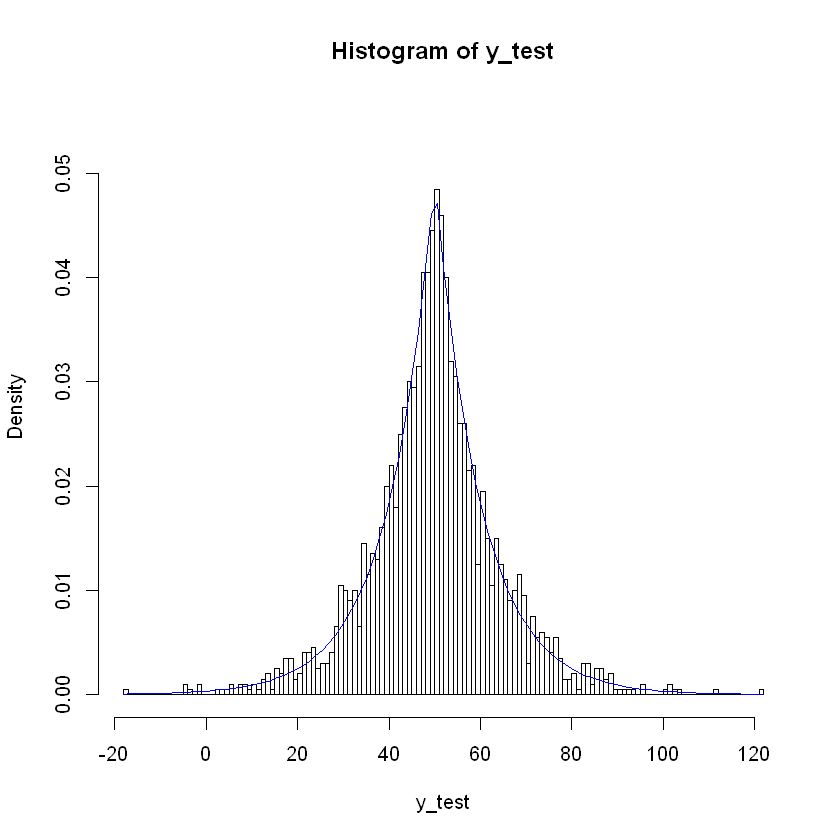

In [30]:
library(rmutil)
y_test = myrlaplace(2000, 50, 10)
hist(y_test, nclass = 100, freq = FALSE, ylim = c(0,0.055))
curve(dlaplace(x, 50, 10), add = TRUE, col = "blue")


In [31]:
mean(y_test)
var(y_test)

[1] 49.8946

[1] 198.3076

The theoretical mean is $\mu = a = 50$, which is very close to our sample mean.

The theoretical variance is $\sigma^2 = 2b^2 = 200$ which again is very close to the sample variance.

In [32]:
median(y_test)
mean(abs(y_test - median(y_test)))


[1] 49.94603

[1] 10.15335

The sample median is the MLE estimate of the parameter $a$, which very close to the actual value of $a=50$.
The sample mean absolute deviation from the median is the MLE of $\hat{b}$, which again is very close to the actual value of $b = 10$.

# Problem 2

## (a)

In [65]:
# install.packages("zoo")
library(zoo)
setwd("../dkout/Downloads/")
SP500<- read.zoo(file="SP500.csv")
y <- diff(log(SP500))
n0 = length(y)
location.mle = median(y)
scale.mle = mean(abs(y-location.mle))
cat("\n ", n0, location.mle, scale.mle, "\n")

ERROR: Error in setwd("../dkout/Downloads/"): cannot change working directory


In [66]:
LRSv = c()
for (i in 1:2000){
    n0 = 439
    a0 = 0.00035
    b0 = 0.006029
    y_star = myrlaplace(n0, a0, b0)

    a_star = median(y_star)
    b_star = mean(abs(y_star - median(y_star)))
    theta_star = c(a_star, b_star)
#     theta_star
    l_star = sum(log(dlaplace(y_star, a_star, b_star)))
    l_0 = sum(log(dlaplace(y_star, a0, b0)))
    LRStat = 2*(l_star - l_0)
#     LRStat
    LRSv[i] = LRStat
}


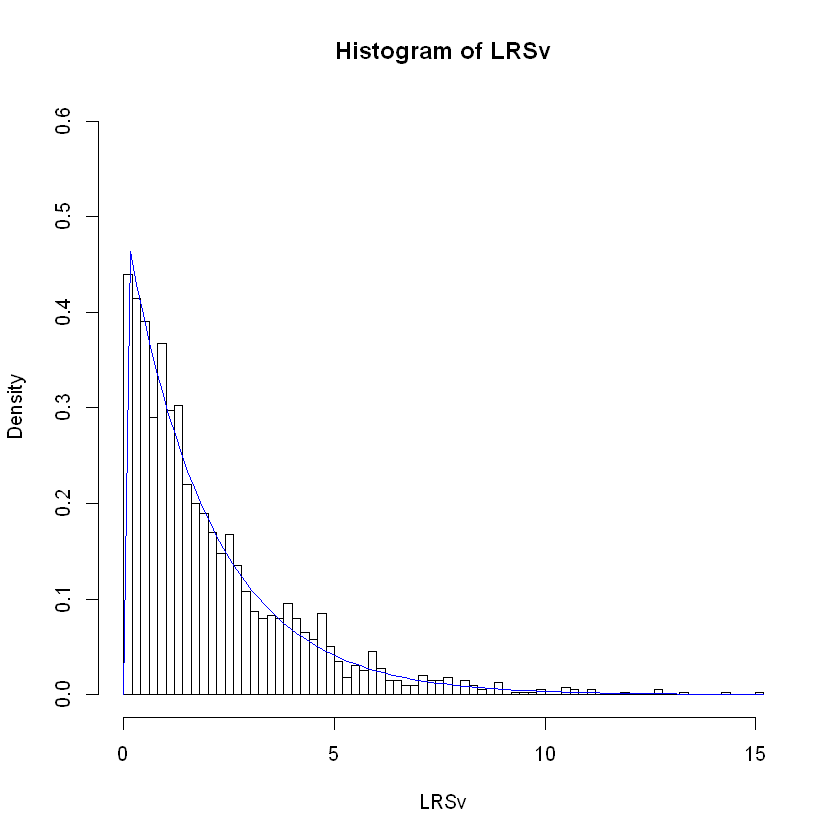

In [67]:
hist(LRSv, freq = FALSE, nclass = 100, ylim = c(0, 0.6))
curve(dchisq(x, df=2), add = TRUE, col = "blue")

Since the blue curve follows the histogram relatively closely, we can say that the density of a Chi-squared distribution with 2 degrees of freedom is a good fit. 

## (c)

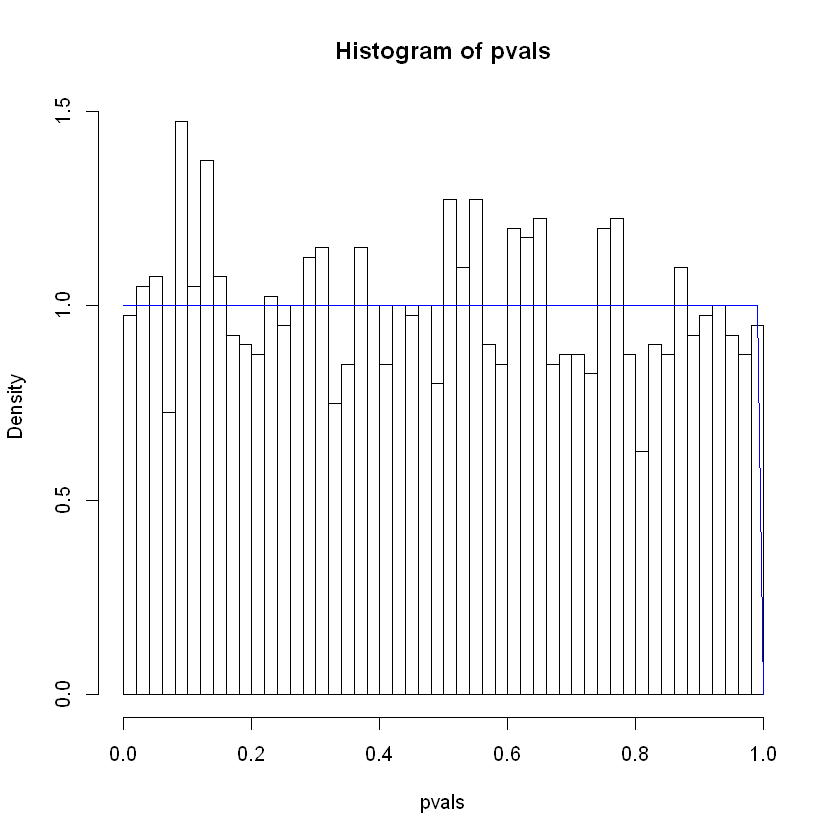

In [68]:
pvals = 1-pchisq(LRSv, df = 2)
hist(pvals, freq = FALSE, nclass = 50)
curve(dunif(x, 0, 1), col = "blue", add = TRUE)

# Problem 3


In [69]:

mean.mle = mean(y)
sd.mle = sqrt((n0-1)*var(y)/n0)
cat("\n ", n0, mean.mle, sd.mle, "\n")


  439 4.361316e-05 0.00840262 


In [70]:
LRSv = c()
for (i in 1:2000){
    n0 = 439
    m0 = 0.0000436
    sd0 = 0.0084
    y_star = rnorm(n0, m0, sd0)

    m_star = mean(y_star)
    sd_star = sqrt(mean((y_star-m_star)^2))
    theta_star = c(a_star, b_star)
#     theta_star
    l_star = sum(log(dnorm(y_star, m_star, sd_star)))
    l_0 = sum(log(dnorm(y_star, m0, sd0)))
    LRStat = 2*(l_star - l_0)
#     LRStat
    LRSv[i] = LRStat
    }


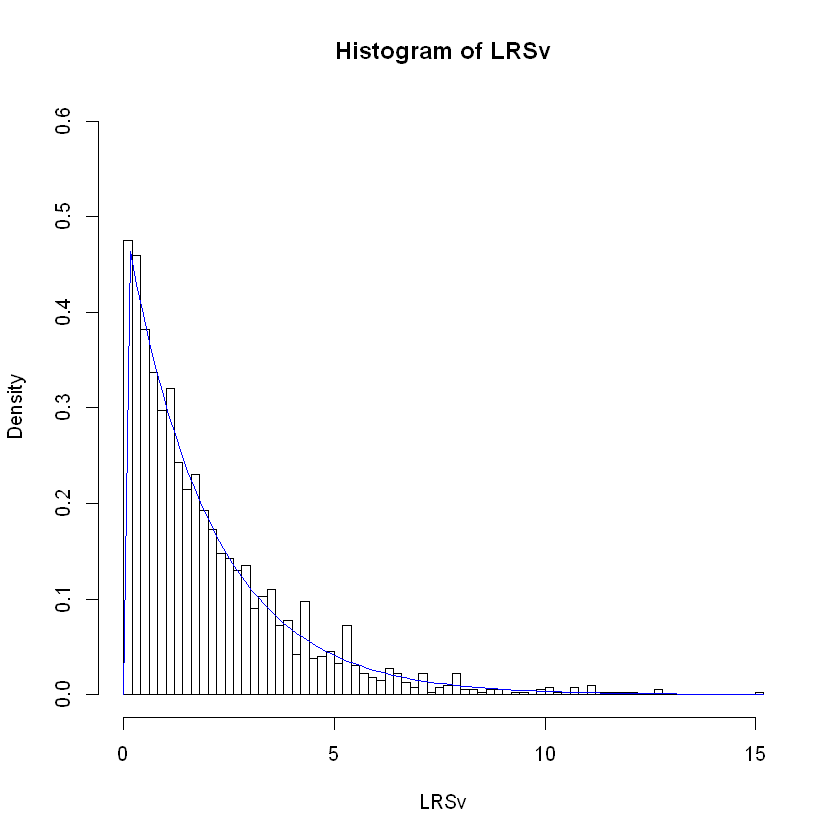

In [71]:
hist(LRSv, freq = FALSE, nclass = 100, ylim = c(0, 0.6))
curve(dchisq(x, df=2), add = TRUE, col = "blue")

Since the blue curve very closely follows the histogram, we can say that the density of a Chi-squared distribution with 2 degrees of freedom is a good fit. 

## (c)

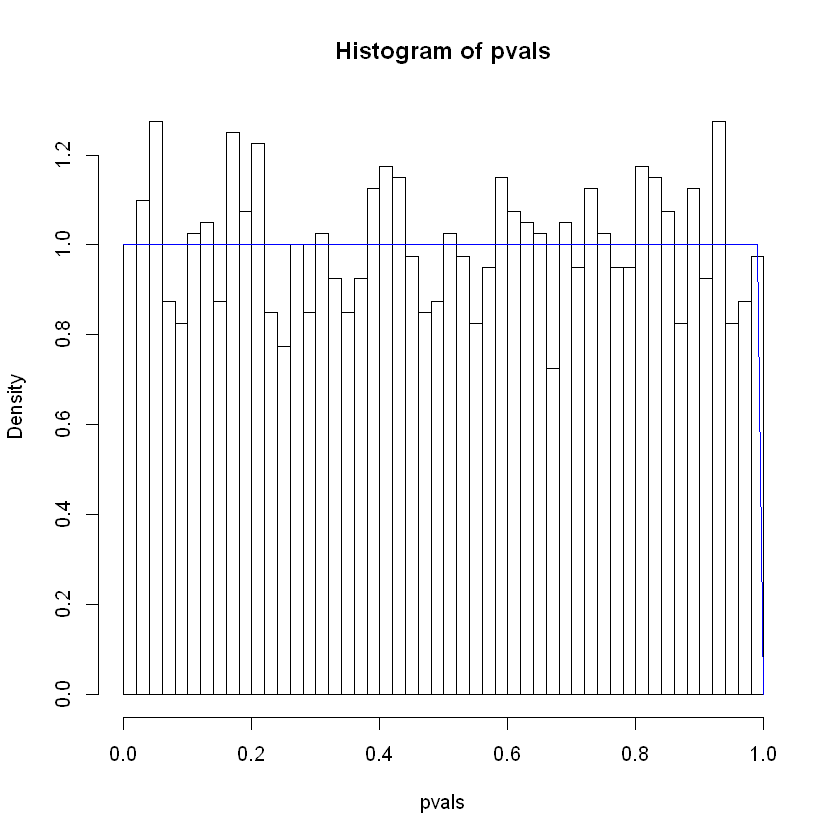

In [72]:
pvals = pchisq(LRSv, df = 2)
hist(pvals, freq = FALSE, nclass = 50)
curve(dunif(x, 0, 1), col = "blue", add = TRUE)

# Problem 4 
## (a)


In [73]:
location.mle = median(y)
scale.mle = mean(abs(y-location.mle))
cat("\n ", n0, location.mle, scale.mle, "\n")

LRSv = c()
for (i in 1:2000){
    
    n0 = 439
    a0 = 0.00035
    b0 = 0.006029
    y_star = myrlaplace(n0, a0, b0)

    a_star = median(y_star)
    b_star = mean(abs(y_star - median(y_star)))
    theta_star = c(a_star, b_star)
#     theta_star
    l_theta = sum(log(dlaplace(y_star, a_star, b_star)))
    
    

    m_star = mean(y_star)
    sd_star = sqrt(mean((y-m_star)^2))
    l_phi = sum(log(dnorm(y_star, m_star, sd_star)))
    LRStat = 2*(l_phi - l_theta)
#     LRStat
    LRSv[i] = LRStat
    
    
}




  439 0.0003495251 0.006028806 


## (b)

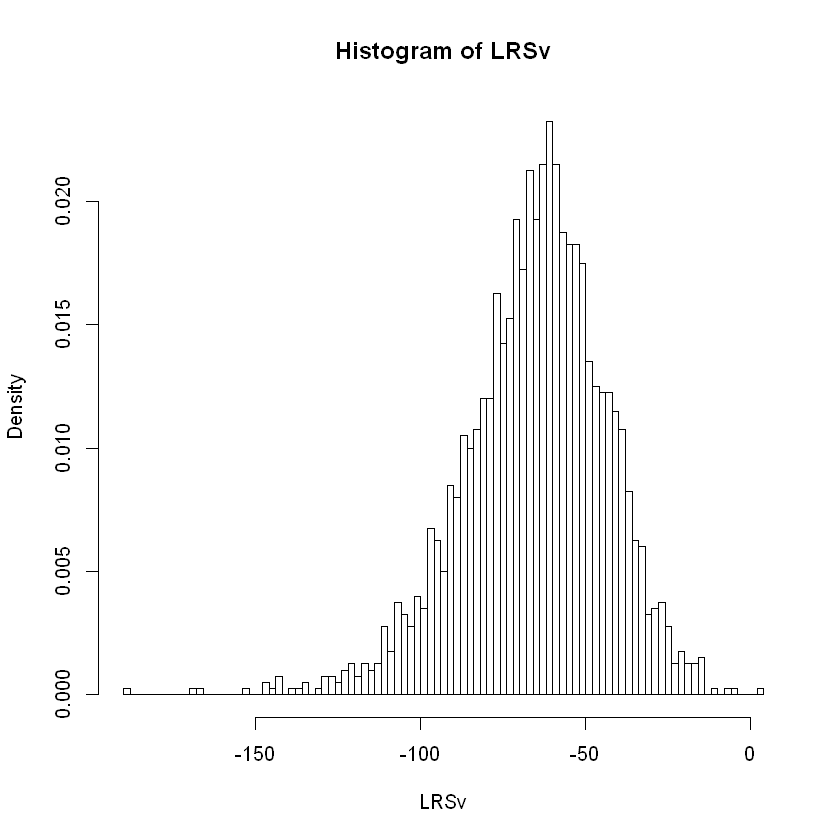

In [74]:
hist(LRSv, nclass = 100, freq = FALSE)


## (c)

In [75]:
ll_star = sum(log(dlaplace(y, a0, b0)))
ln_star = sum(log(dnorm(y, m0, sd0)))
LRStat = 2*(ln_star - ll_star)
LRStat

[1] -50.73602

## (d)


  439 0.0003495251 0.006028806 


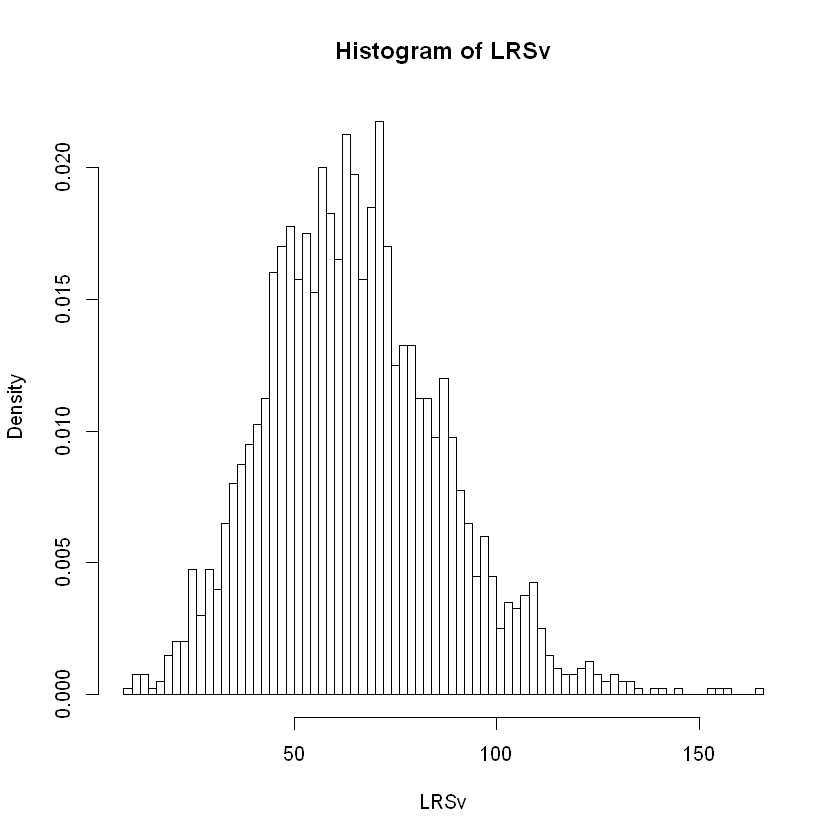

In [76]:
location.mle = median(y)
scale.mle = mean(abs(y-location.mle))
cat("\n ", n0, location.mle, scale.mle, "\n")

LRSv = c()
for (i in 1:2000){
    
    n0 = 439
    a0 = 0.00035
    b0 = 0.006029
    y_star = myrlaplace(n0, a0, b0)

    a_star = median(y_star)
    b_star = mean(abs(y_star - median(y_star)))
    theta_star = c(a_star, b_star)
#     theta_star
    l_theta = sum(log(dlaplace(y_star, a_star, b_star)))
    
    

    m_star = mean(y_star)
    sd_star = sqrt(mean((y-m_star)^2))
    l_phi = sum(log(dnorm(y_star, m_star, sd_star)))
    LRStat = 2*(l_theta - l_phi)
#     LRStat
    LRSv[i] = LRStat
    
    
}

hist(LRSv, nclass = 100, freq = FALSE)

# Problem 5
## (a)


In [77]:
leukemia_big <- read.csv(file = "./pset5/pset5//EfronData/leukemia_big.csv")
dim(leukemia_big)
names(leukemia_big)

[1] 7128   72

[1] "ALL"    "ALL.1"  "ALL.2"  "ALL.3"  "ALL.4"  "ALL.5"  "ALL.6"  "ALL.7" 
 [9] "ALL.8"  "ALL.9"  "ALL.10" "ALL.11" "ALL.12" "ALL.13" "ALL.14" "ALL.15"
[17] "ALL.16" "ALL.17" "ALL.18" "ALL.19" "AML"    "AML.1"  "AML.2"  "AML.3" 
[25] "AML.4"  "AML.5"  "AML.6"  "AML.7"  "AML.8"  "AML.9"  "AML.10" "AML.11"
[33] "AML.12" "AML.13" "ALL.20" "ALL.21" "ALL.22" "ALL.23" "ALL.24" "ALL.25"
[41] "ALL.26" "ALL.27" "ALL.28" "ALL.29" "ALL.30" "ALL.31" "ALL.32" "ALL.33"
[49] "ALL.34" "ALL.35" "ALL.36" "ALL.37" "ALL.38" "ALL.39" "ALL.40" "ALL.41"
[57] "ALL.42" "ALL.43" "ALL.44" "ALL.45" "ALL.46" "AML.14" "AML.15" "AML.16"
[65] "AML.17" "AML.18" "AML.19" "AML.20" "AML.21" "AML.22" "AML.23" "AML.24"

In [78]:
leukemiaType<-as.factor(substring(names(leukemia_big), first=1,last=3)) 
genej<-as.numeric(t(leukemia_big[j<-136,])) 
genej.byType<-split(genej,leukemiaType)

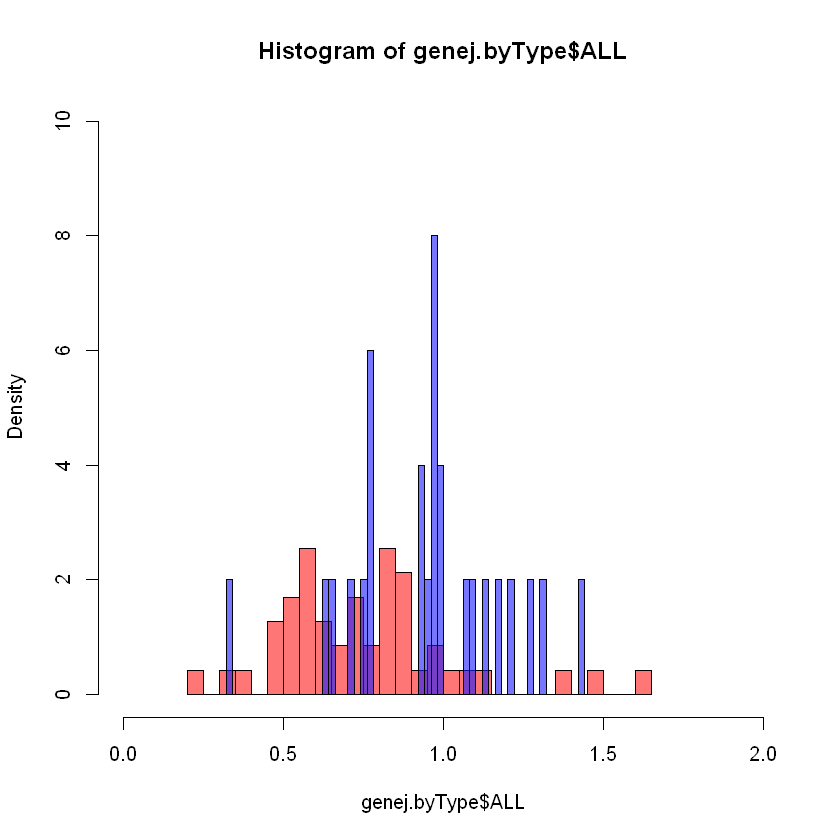

In [79]:
hist(genej.byType$ALL, freq = FALSE, nclass  = 50, xlim = c(0,2), ylim = c(0,10), col = rgb(1,0.1,0.1,0.6))
hist(genej.byType$AML, freq = FALSE, nclass = 50,  add = TRUE, col = rgb(0.1,0.1,1, 0.6))


## (b)

In [80]:
genej.ttest <- t.test(genej.byType[[1]], genej.byType[[2]], var.equal = TRUE)

genej.ttest
names(genej.ttest)



	Two Sample t-test

data:  genej.byType[[1]] and genej.byType[[2]]
t = -3.014, df = 70, p-value = 0.003589
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.32817995 -0.06680742
sample estimates:
mean of x mean of y 
0.7524794 0.9499731 


[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
[6] "null.value"  "alternative" "method"      "data.name"

In [81]:
library(perm)
mytwosample.exact.mc<-function (gene1, gene2, alternative = "two.sided", nmc = 10^4, seed = 1234321, digits = 12, p.conf.level = 0.99, setSEED = TRUE){
    t0.test<-t.test(gene1, gene2,var.equal=TRUE)
    t0 <-t0.test$statistic
    N <- nmc
    if (setSEED)
        set.seed(seed)
    ti <- rep(NA, N)
    for (i in 1:N) {
        perms = sample(c(gene1, gene2))
        ti.test<-t.test(perms[1:length(gene1)], perms[length(gene1)+1:length(gene2)], var.equal=TRUE)
        ti[i] <- ti.test$statistic
#         print(ti.test)
    }
    out <- calcPvalsMC(ti, t0, digits, alternative, FALSE, p.conf.level)
    result<-list(t0=t0, ti=ti, out=out)
}

In [82]:
genej.permTest <- mytwosample.exact.mc(genej.byType[[1]], genej.byType[[2]])

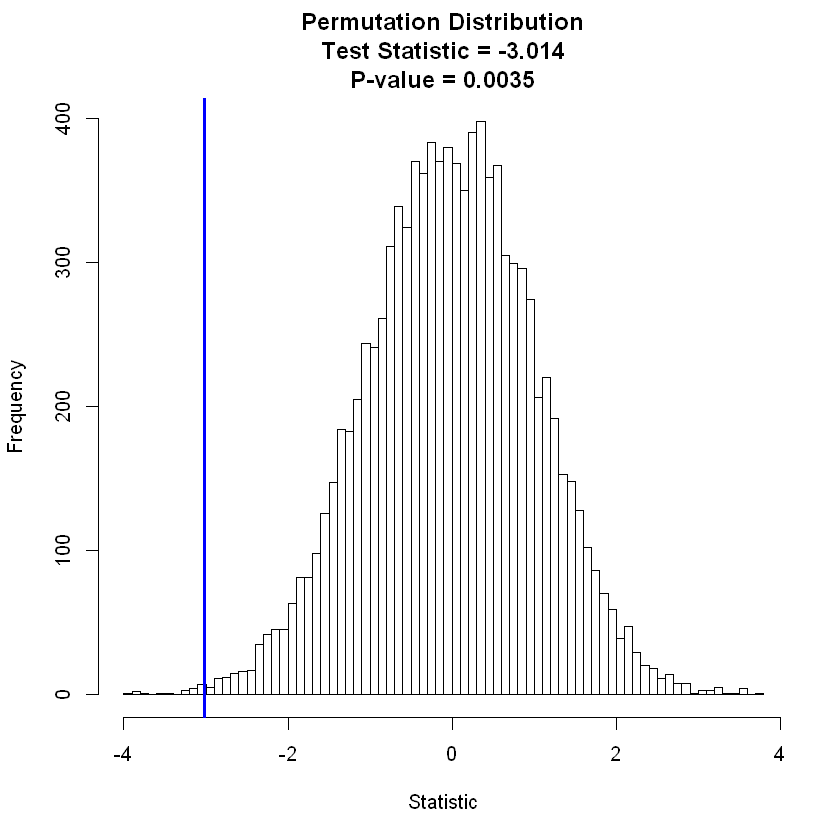

In [83]:
genej.pvalue<-mean(abs(genej.permTest$ti) >=abs(genej.permTest$t0))
hist(genej.permTest$ti,nclass=100,xlab="Statistic",main=paste(c("Permutation Distribution\n","Test Statistic = ", as.character(round(genej.permTest$t0,digits=4)),"\n","P-value = ",as.character(round(genej.pvalue,digits=4))), collapse=""))
abline(v=genej.permTest$t0,col='blue',lwd=3)

## (c)

In [84]:
library(coin)
group<-c(rep(0,times=25),rep(1,times=47))
independence_test(genej ~ leukemiaType)


	Asymptotic General Independence Test

data:  genej by leukemiaType (ALL, AML)
Z = -2.8558, p-value = 0.004293
alternative hypothesis: two.sided


## (d)

In [85]:
permTS(genej~leukemiaType)


	Permutation Test using Asymptotic Approximation

data:  genej by leukemiaType
Z = -2.8558, p-value = 0.004293
alternative hypothesis: true mean leukemiaType=ALL - mean leukemiaType=AML is not equal to 0
sample estimates:
mean leukemiaType=ALL - mean leukemiaType=AML 
                                   -0.1974937 


## (e)
It seems that the pvalues are close enough, thus the results are relatively consistent.


## (f)

In [86]:
test_vec = c()
for (i in 1:7128){
   genej<-as.numeric(t(leukemia_big[j<-i,])) 
   genej.byType<-split(genej,leukemiaType)
   genej.ttest <- t.test(genej.byType[[1]], genej.byType[[2]], var.equal = TRUE)
   test_vec[i] = genej.ttest$statistic
 
}

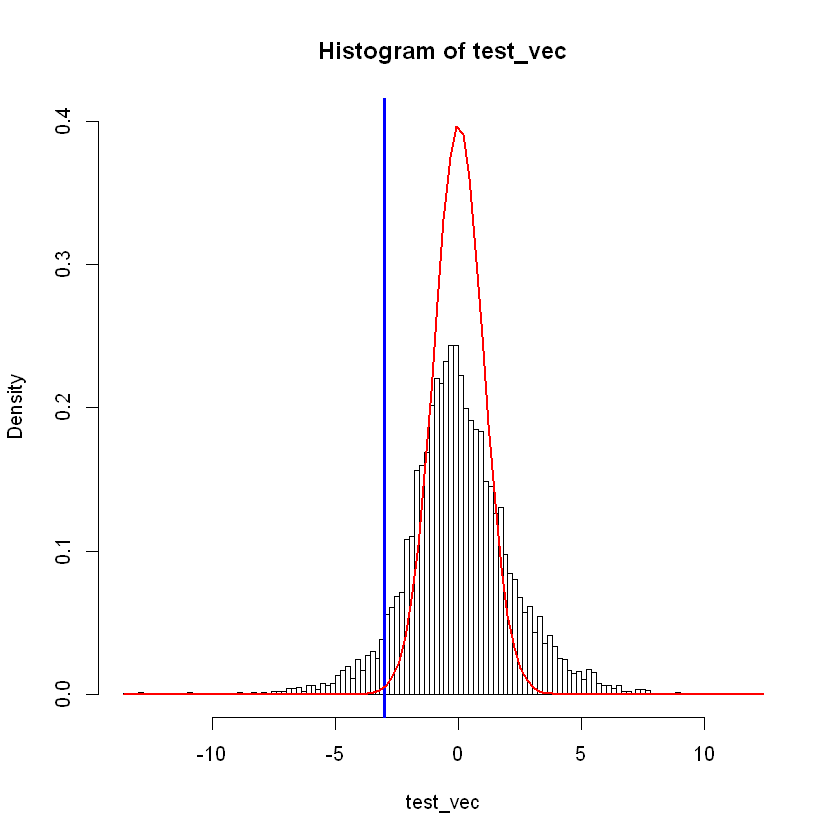

In [88]:
options(warn=-1)

hist(test_vec, freq = F, nclass  = 100, ylim = c(0,0.4))
abline(v=genej.permTest$t0,col='blue',lwd=3)
curve(dt(x, 70, 0), add = T, col = "red", lwd = 2)

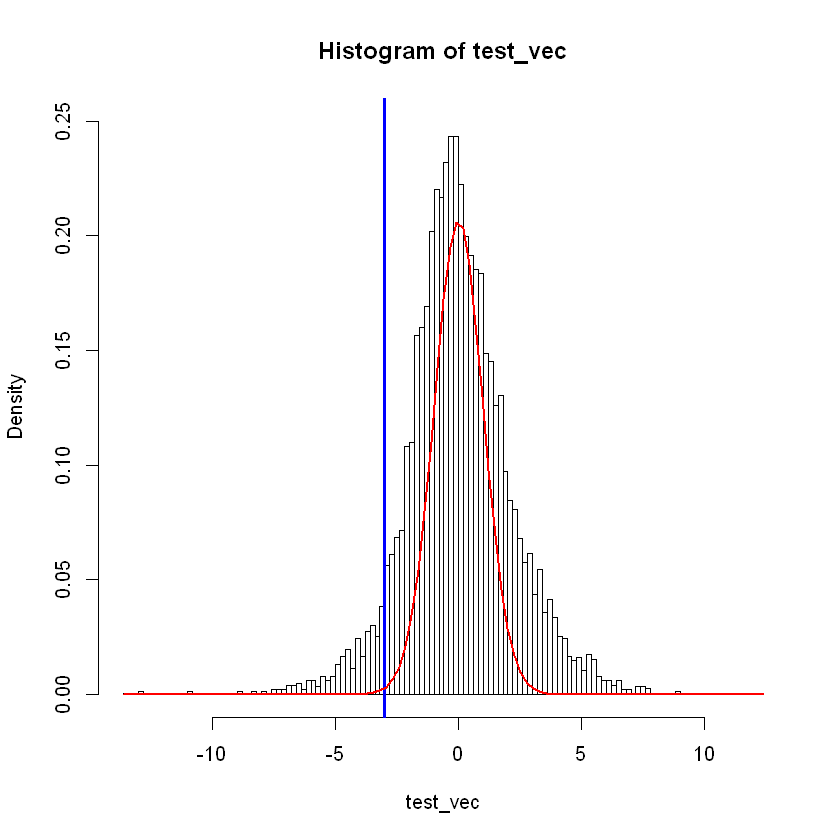

In [94]:

hist(test_vec, freq = F, nclass  = 100, ylim = c(0,0.25))
abline(v=genej.permTest$t0,col='blue',lwd=3)
curve(0.52*dt(x, 70, 0), add = T, col = "red", lwd = 2)

From the graph above, it seems the value of $\pi_0$ can be at most around 0.5.